### Importing necessary libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### READING DATASET

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/HR_attrition_rate.csv')  
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#### Let's do some non-graphical analysis first to understand the dataset

In [3]:
df.shape

(14999, 10)

In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments               object
salary                    object
dtype: object

In [11]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

### Observations:

. There no null values are present in the given dataset

. 14999 rowa and 10columns out of which one column is a target variable

. As the 'mean' and '50%' ie mean is almost same for all columns it means that skewness may not be present in the data

. Also the 'max' and '75%' are also same for  all attributes means outliers also may not be present here

. Out of 10 attributes 2 of float type, 6 of integer and remaining 2 are of object datatypes

In [12]:
#### To check the num of unique values in each column
df.nunique().to_frame('No of unique values')

,No of unique values
satisfaction_level,92
last_evaluation,65
number_project,6
average_montly_hours,215
time_spend_company,8
Work_accident,2
left,2
promotion_last_5years,2
Departments,10
salary,3


#### Checking the categoreis of target column

In [13]:
df[ 'salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [14]:
df['salary'].nunique()

3

#### Checking value count for each variable

In [15]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.26     30
0.12     30
Name: satisfaction_level, Length: 92, dtype: int64


0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
       ... 
0.39     52
0.43     50
0.38     50
0.44     44
0.36     22
Name: last_evaluation, Length: 65, dtype: int64


4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64


135    153
156    153
149    148
151    147
160    136
      ... 
297      7
288      6
299      6
96       6
303      6
Name: average_montly_hours, Length: 215, dtype: int64


3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64


0    12830
1     2169
Name: Work_accident, dtype: int64


0    11428
1     3571
Name: left, dtype: int64


0    14680
1      319
Name: promotion_last_5years, dtype: int64


sales          4140
technical      2720
support        22

#### We can see that in target variable ie 'salary' there appears more existance of 'low'(salary hike)

#### Lets visualise it by count plot

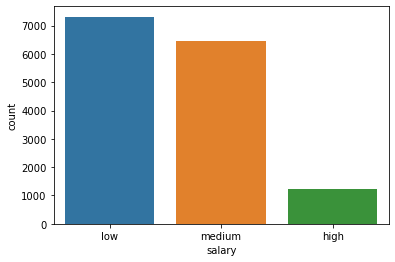

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


In [22]:
ax = sns.countplot(x='salary', data=df)
plt.show()
print(df['salary'].value_counts())

ValueError: could not convert string to float: 'sales'

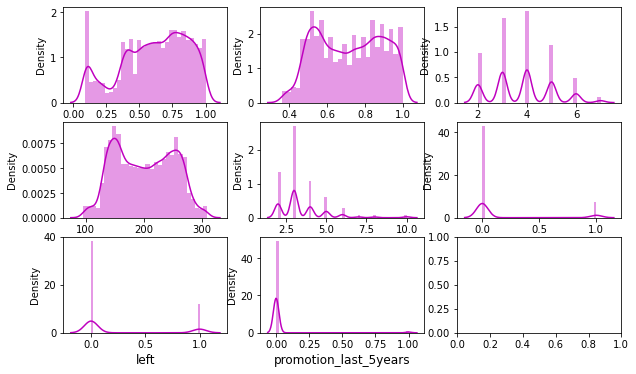

In [26]:
# To check how the data has been distributed in columns
plt.figure(figsize = (10,6), facecolor = 'white')
plotnumber = 1
for col in df.columns:
    if plotnumber<=10:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[col], color = 'm')
        plt.xlabel(col, fontsize =12 )
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()    

### Compairing  two columns with stripplot:

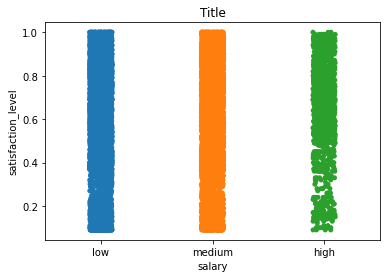

In [28]:
plt.title("Title")
sns.stripplot(x = 'salary', y = 'satisfaction_level', data = df)
plt.show()

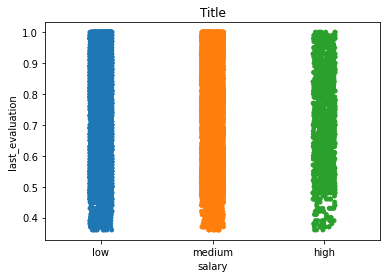

In [29]:
plt.title("Title")
sns.stripplot(x = 'salary', y = 'last_evaluation', data = df)
plt.show()

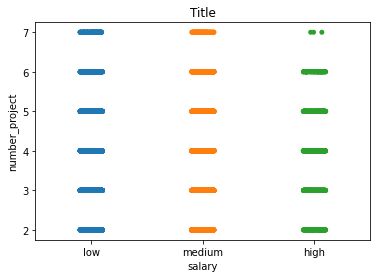

In [30]:
plt.title("Title")
sns.stripplot(x = 'salary', y = 'number_project', data = df)
plt.show()

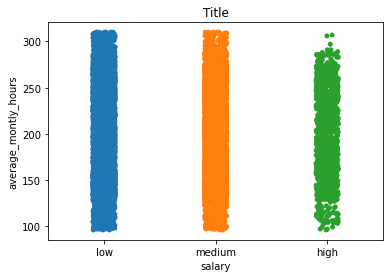

In [31]:
plt.title("Title")
sns.stripplot(x = 'salary', y = 'average_montly_hours', data = df)
plt.show()

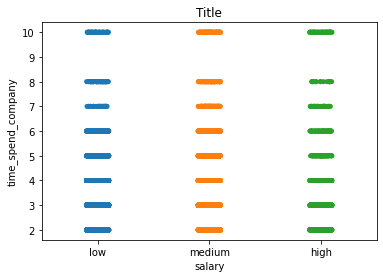

In [32]:
plt.title("Title")
sns.stripplot(x = 'salary', y = 'time_spend_company', data = df)
plt.show()

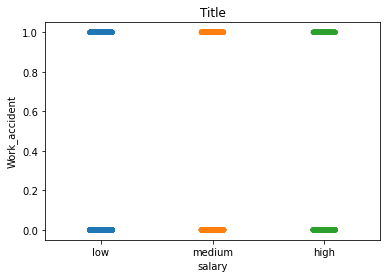

In [33]:
plt.title("Title")
sns.stripplot(x = 'salary', y = 'Work_accident', data = df)
plt.show()

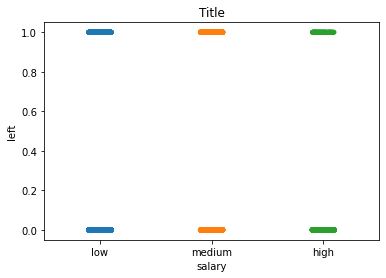

In [34]:
plt.title("Title")
sns.stripplot(x = 'salary', y = 'left', data = df)
plt.show()

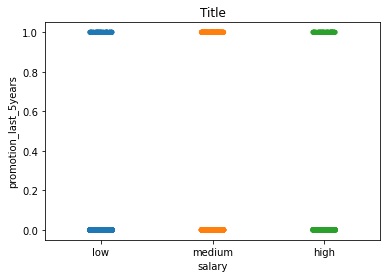

In [35]:
plt.title("Title")
sns.stripplot(x = 'salary', y = 'promotion_last_5years', data = df)
plt.show()

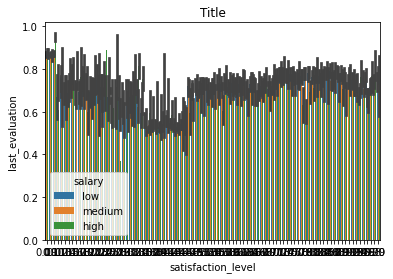

In [40]:
### Compairing columns using bar plot:

plt.title("Title")
sns.barplot(x = 'satisfaction_level', y = 'last_evaluation', data = df, hue = 'salary')
plt.show()

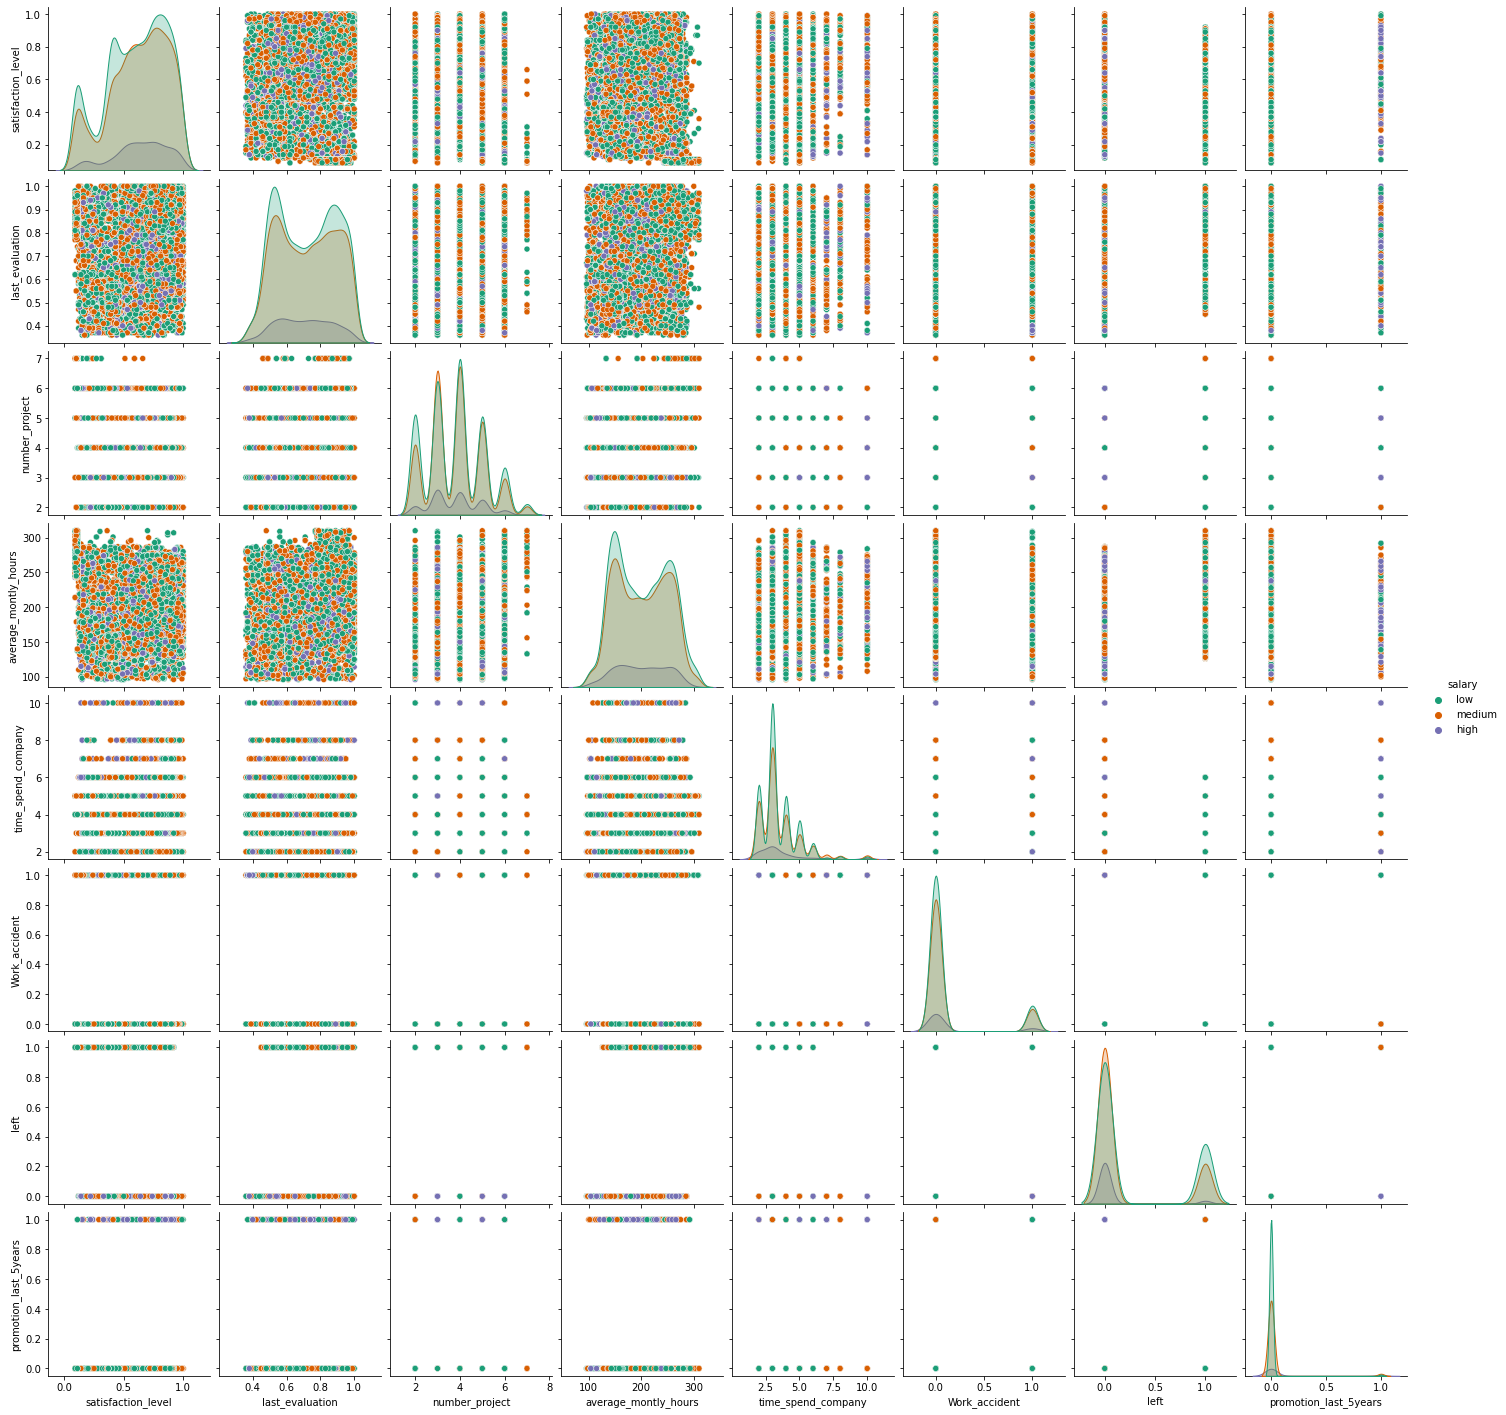

In [42]:
#### Multivariate Analysis

sns.pairplot(df, hue = 'salary', palette = 'Dark2')
plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.

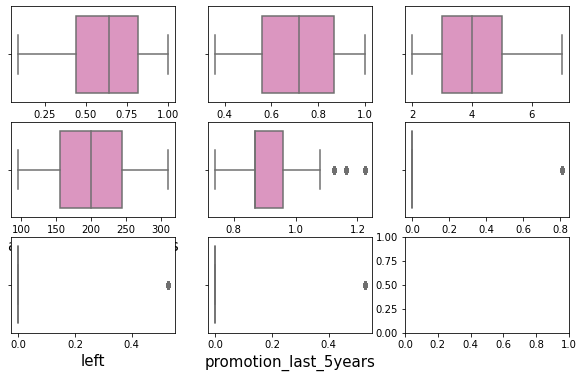

In [63]:
## Checking outliers using boxplot

plt.figure(figsize = (10,6), facecolor = 'white')
plotnumber = 1
for col in df.columns:
    if plotnumber<= 10:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

#### We can see that the outliers are present in some columns

In [45]:
### Checking for  skeweness

df.skew()

satisfaction_level      -0.476360
last_evaluation         -0.026622
number_project           0.337706
average_montly_hours     0.052842
time_spend_company       1.853319
Work_accident            2.021149
left                     1.230043
promotion_last_5years    6.636968
dtype: float64

#### Removing skewness

### We cann't remove the skewness and outliers in the categorical columns

In [48]:
skew = ('time_spend_company')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [51]:
df.skew()

satisfaction_level      -0.476360
last_evaluation         -0.026622
number_project           0.337706
average_montly_hours     0.052842
time_spend_company       0.490831
Work_accident            2.021149
left                     1.230043
promotion_last_5years    6.636968
dtype: float64

#### Now encode the object datatypes to integer

In [55]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [58]:
df2 = lab_enc.fit_transform(df['salary'])

pd.Series(df2)

0        1
1        2
2        2
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Length: 14999, dtype: int32

In [59]:
df['salary'] = df2

df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,0.869742,0.0,0.526589,0.0,sales,1
1,0.80,0.86,5,262,1.080418,0.0,0.526589,0.0,sales,2
2,0.11,0.88,7,272,0.959135,0.0,0.526589,0.0,sales,2
3,0.72,0.87,5,223,1.026672,0.0,0.526589,0.0,sales,1
4,0.37,0.52,2,159,0.869742,0.0,0.526589,0.0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,0.869742,0.0,0.526589,0.0,support,1
14995,0.37,0.48,2,160,0.869742,0.0,0.526589,0.0,support,1
14996,0.37,0.53,2,143,0.869742,0.0,0.526589,0.0,support,1
14997,0.11,0.96,6,280,0.959135,0.0,0.526589,0.0,support,1


In [62]:
df[ 'Departments'].unique()

KeyError: 'Departments'